In [97]:
import pandas as pd
import numpy as np
import math

In [98]:
data = pd.read_csv("https://raw.githubusercontent.com/AUP-CS2091/Week-10/master/animals.csv")
data

,Unnamed: 0,war,fly,ver,end,gro,hai
0,ant,1,1,1,1.0,2.0,1
1,bee,1,2,1,1.0,2.0,2
2,cat,2,1,2,1.0,1.0,2
3,cpl,1,1,1,1.0,1.0,2
4,chi,2,1,2,2.0,2.0,2
5,cow,2,1,2,1.0,2.0,2
6,duc,2,2,2,1.0,2.0,1
7,eag,2,2,2,2.0,1.0,1
8,ele,2,1,2,2.0,2.0,1
9,fly,1,2,1,1.0,1.0,1


In [99]:
data['end'] = data['end'].map(lambda x: 0 if math.isnan(x) or x == -1 else x)
data['gro'] = data['gro'].map(lambda x: 0 if math.isnan(x) or x == -1 else x)
data.rename(columns={'Unnamed: 0':'animals'}, inplace=True)
data['animals'] = data['animals'].astype('category').cat.codes

In [100]:
cleaned_data

,animals,war,fly,ver,end,gro,hai,cluster
0,0,1,1,1,1.0,2.0,1,4
1,1,1,2,1,1.0,2.0,2,4
2,2,2,1,2,1.0,1.0,2,2
3,5,1,1,1,1.0,1.0,2,2
4,3,2,1,2,2.0,2.0,2,11
5,4,2,1,2,1.0,2.0,2,2
6,6,2,2,2,1.0,2.0,1,0
7,7,2,2,2,2.0,1.0,1,0
8,8,2,1,2,2.0,2.0,1,6
9,9,1,2,1,1.0,1.0,1,6


In [101]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=10)
arr = clusters.fit_predict(data[['war', 'fly', 'ver', 'end', 'gro', 'hai']])

data['cluster'] = arr

data.sort_values('cluster')

data.groupby('cluster').mean()

,animals,war,fly,ver,end,gro,hai
cluster,,,,,,,
0,13.5,1.0,1.0,1.75,1.25,0.25,1.0
1,8.5,2.0,1.0,2.00,0.75,1.75,2.0
2,11.5,1.0,1.0,1.00,0.50,1.00,2.0
3,9.0,1.0,2.0,1.00,1.00,1.00,1.0
4,9.0,2.0,1.0,2.00,2.00,2.00,2.0
5,13.5,2.0,1.0,2.00,2.00,2.00,1.0
6,5.5,1.0,1.0,1.50,1.00,2.00,1.0
7,6.0,2.0,2.0,2.00,1.00,2.00,1.0
8,1.0,1.0,2.0,1.00,1.00,2.00,2.0


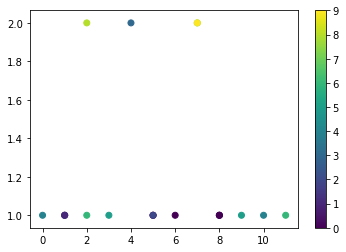

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['cluster'], data['fly'], c=arr)
plt.colorbar()

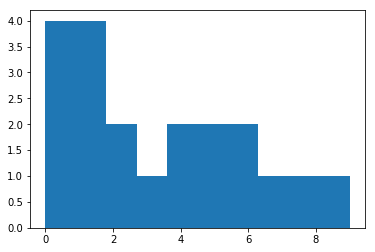

In [103]:
_ = plt.hist(data['cluster'], 10)

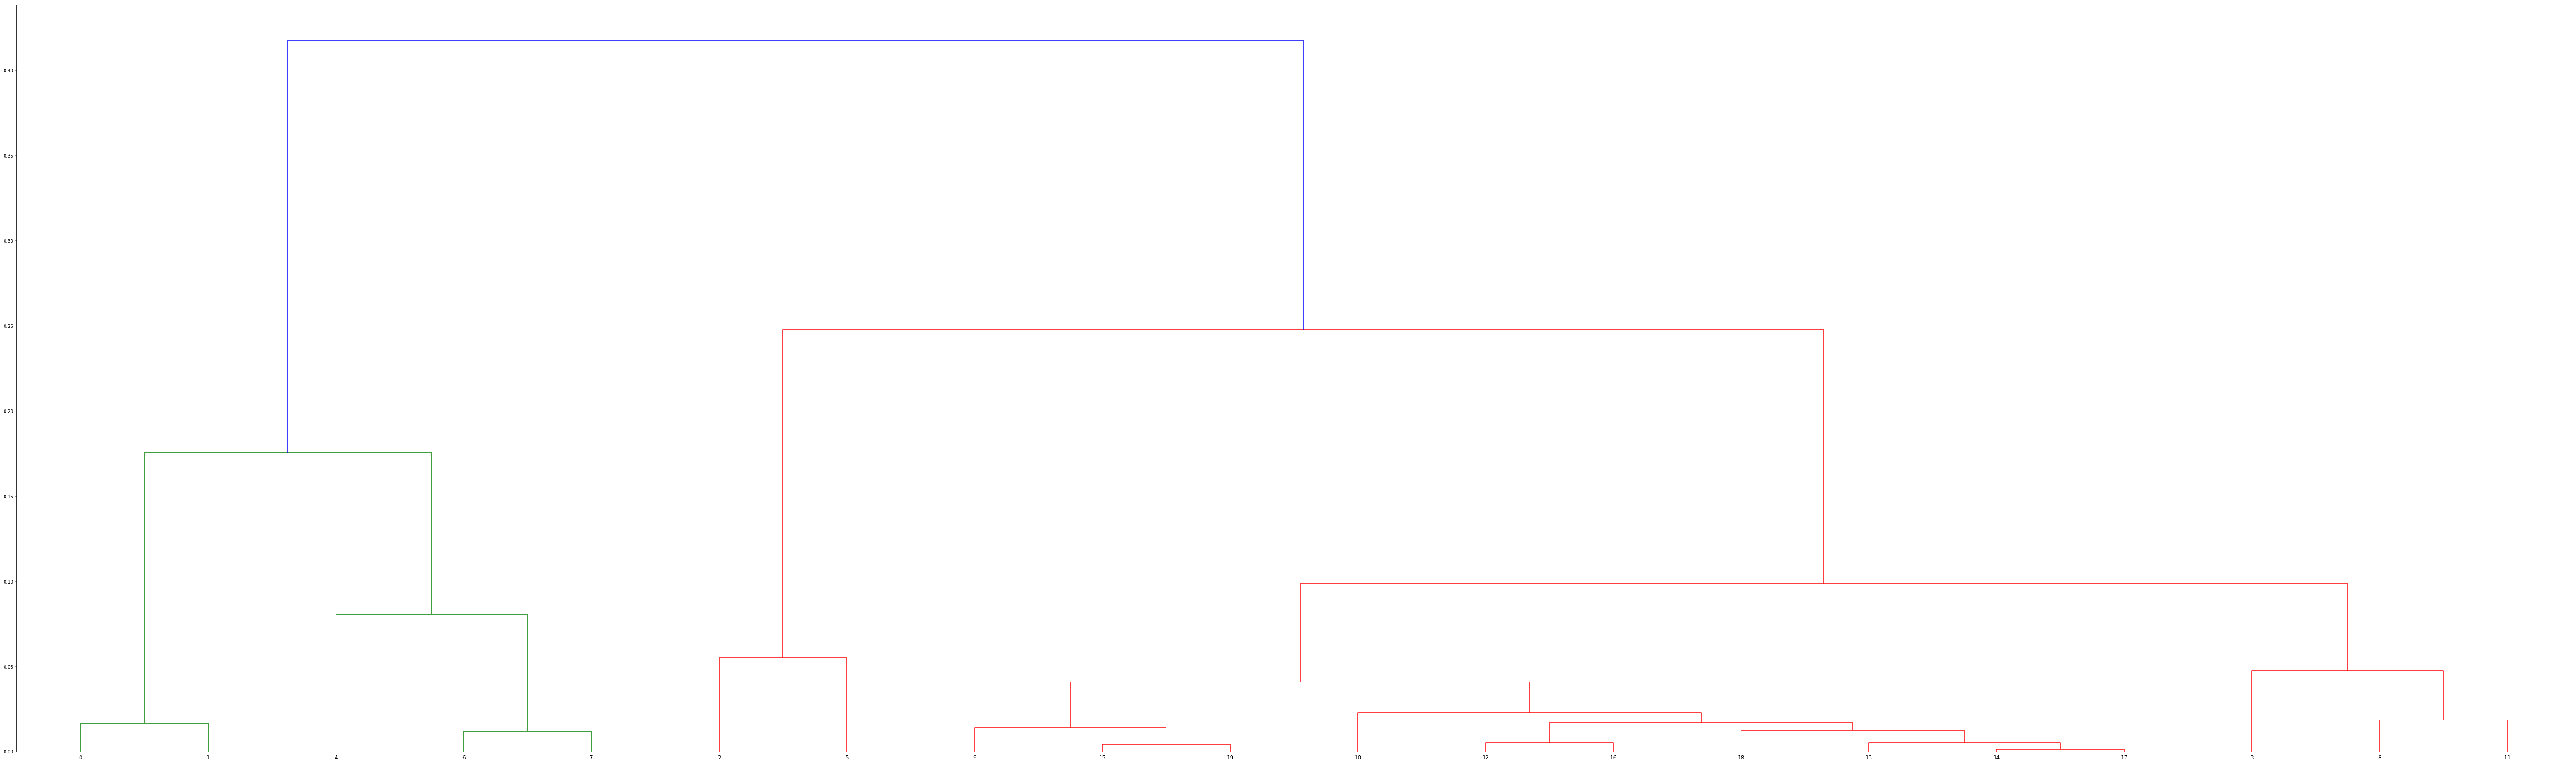

In [104]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

dists = pdist(data, metric="cosine")
links = linkage(dists, method="average")
plt.figure(figsize=(100, 30))
den = dendrogram(links)

In [105]:
data.iloc[10]

animals    10.0
war         1.0
fly         1.0
ver         2.0
end         2.0
gro         0.0
hai         1.0
cluster     0.0
Name: 10, dtype: float64

In [106]:
data["fly"][0:5]

0    1
1    2
2    1
3    1
4    1
Name: fly, dtype: int64

In [107]:
from sklearn.cluster import KMeans
model = KMeans(12)
model.fit(data)
clusters = model.predict(data)
data['cluster'] = clusters

In [108]:
groups = data.groupby('cluster')
group1 = groups.get_group(0)
group2 = groups.get_group(1)
group3 = groups.get_group(2)
group4 = groups.get_group(3)
group5 = groups.get_group(4)
group6 = groups.get_group(5)
group7 = groups.get_group(6)
group8 = groups.get_group(7)
group9 = groups.get_group(8)
group10 = groups.get_group(9)

In [109]:
group1

,animals,war,fly,ver,end,gro,hai,cluster
15,15,2,1,2,2.0,2.0,2,0


In [110]:
group2

,animals,war,fly,ver,end,gro,hai,cluster
2,2,2,1,2,1.0,1.0,2,1
3,5,1,1,1,1.0,1.0,2,1
5,4,2,1,2,1.0,2.0,2,1


In [111]:
group3

,animals,war,fly,ver,end,gro,hai,cluster
0,0,1,1,1,1.0,2.0,1,2
1,1,1,2,1,1.0,2.0,2,2


In [112]:
group4

,animals,war,fly,ver,end,gro,hai,cluster
8,8,2,1,2,2.0,2.0,1,3


In [113]:
group5

,animals,war,fly,ver,end,gro,hai,cluster
9,9,1,2,1,1.0,1.0,1,4


In [114]:
group6

,animals,war,fly,ver,end,gro,hai,cluster
16,16,2,1,2,1.0,2.0,2,5
17,17,1,1,2,1.0,0.0,1,5
18,18,1,1,1,0.0,1.0,2,5


In [115]:
group7

,animals,war,fly,ver,end,gro,hai,cluster
10,10,1,1,2,2.0,0.0,1,6


In [116]:
group8

,animals,war,fly,ver,end,gro,hai,cluster
6,6,2,2,2,1.0,2.0,1,7
7,7,2,2,2,2.0,1.0,1,7


In [117]:
group9

,animals,war,fly,ver,end,gro,hai,cluster
12,12,2,1,2,0.0,2.0,2,8
13,13,1,1,2,1.0,1.0,1,8
14,14,1,1,1,1.0,0.0,1,8


In [118]:
group10

,animals,war,fly,ver,end,gro,hai,cluster
19,19,2,1,2,2.0,2.0,1,9


In [119]:
data.apply(lambda x: 1 if x['cluster'] == 0
    else 0, axis = 1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
dtype: int64

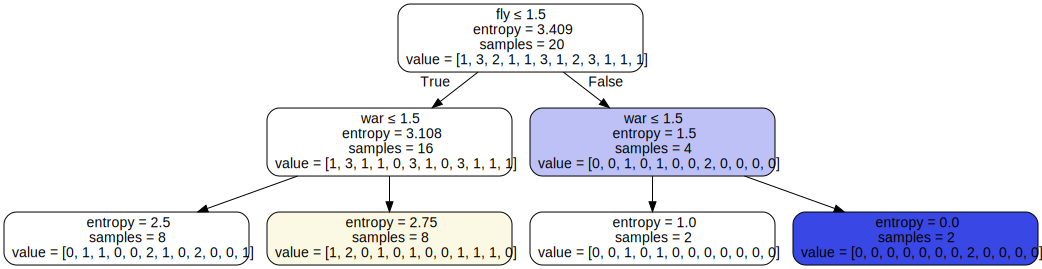

In [121]:
X = data[['fly', 'war']]

Y = data['cluster']

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph